In [2]:
import os 

import pandas as pd
import numpy as np
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query

In [3]:
query = '''select * from customers limit 4;'''
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [4]:
query = 'show tables;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [5]:
query = '''select * from salesdata limit 3;'''
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [6]:
query = """select s.customerid, c.firstname,s.saledate, s.totalprice
from salesdata s
join customers c
on s.customerid = c.customerid
limit 5;
"""

read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [7]:
query = """
select t.customerid,c.firstname,t.expenditure
from
(Select customerid,
sum(totalprice) as expenditure
from salesdata
group by customerid) t
join customers c
on t.customerid=c.customerid
order by t.expenditure desc
limit 10;
"""

top_annual_customers = read_query(query)

In [8]:
top_annual_customers

,customerid,firstname,expenditure
0,C-2023-100-13,Veer,13016064.00
1,C-2023-100-94,Priyansh,12629337.00
2,C-2023-100-57,Riya,12599608.00
3,C-2023-100-58,Vanya,12455437.00
4,C-2023-100-88,Dhruv,12280916.00
5,C-2023-100-165,Tarini,12130487.00
6,C-2023-100-197,Yuvraj,11868602.00
7,C-2023-100-199,Rhea,11704275.00
8,C-2023-100-196,Darshit,11520699.00
9,C-2023-100-75,Prerak,11442527.00


In [9]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerid   10 non-null     object
 1   firstname    10 non-null     object
 2   expenditure  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [10]:
top_annual_customers ['expenditure'] = top_annual_customers ['expenditure'].astype(float)

In [11]:
top_annual_customers ['expenditure'].values

array([13016064., 12629337., 12599608., 12455437., 12280916., 12130487.,
       11868602., 11704275., 11520699., 11442527.])

In [12]:
customer_exp = top_annual_customers['expenditure'].values

In [13]:
customer_names = top_annual_customers['firstname'].values

In [18]:
cmap_val = np.linspace(0.3,1,10)

In [19]:
cmap = plt.cm.PuBuGn(cmap_val)

<h1 style="color:white">Using cmap

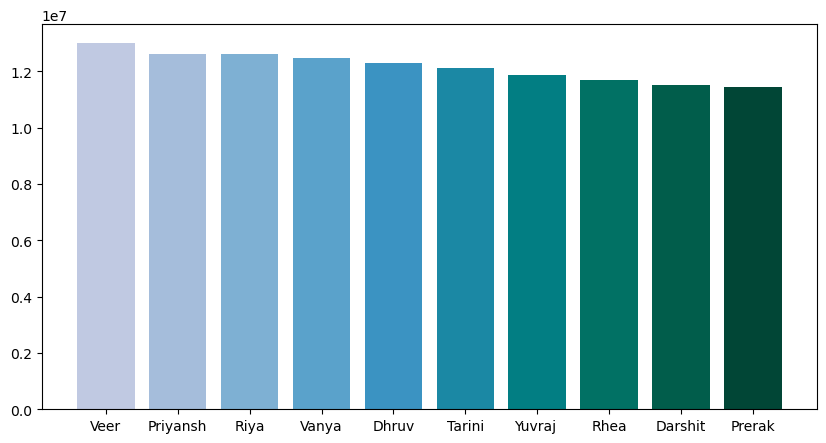

In [20]:
# colors = ['teal','green','yellow','darkred','darkgreen','pink','orange','magenta','purple','blue']




plt.figure(figsize=(10,5))
plt.bar(height=customer_exp,x=customer_names,color=cmap)
plt.savefig('top_annual_customers.jpeg')

In [32]:
query ='show tables;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [27]:
query ='select * from employees limit 10;'
read_query(query)

,EmployeeID,FirstName,LastName,Email,Phone,Address,State,HireDate,Department,Salary
0,1001,Fateh,Roy,fname.lname@swiftm.org,+915182804115,H.No. 99\nMalhotra Circle,Bihar,2019-04-23,Marketing,54050.23
1,1002,Chirag,Balan,fname.lname@swiftm.org,06425511681,"91, Kalita",Chhattisgarh,2016-03-31,Legal,57094.43
2,1003,Dhanush,Lata,fname.lname@swiftm.org,+916818532690,H.No. 234\nLall,Bihar,2013-05-05,Accounts,40736.84
3,1004,Anika,Batta,fname.lname@swiftm.org,+914753170991,189\nThaker Zila,Arunachal Pradesh,2010-09-19,Legal,20412.30
4,1005,Keya,Dixit,fname.lname@swiftm.org,4791301806,"H.No. 42, Sachar",Manipur,2011-10-23,Logistics,49586.07
5,1006,Samaira,Guha,fname.lname@swiftm.org,02640396972,41\nKaran Marg,Meghalaya,2012-03-06,Sales,27064.89
6,1007,Vedika,Kaul,fname.lname@swiftm.org,+918212753681,H.No. 521\nChadha,Telangana,2011-03-06,ML Engineer,31941.74
7,1008,Rhea,Handa,fname.lname@swiftm.org,6776911268,25\nChand Circle,Arunachal Pradesh,2022-08-06,HR Admin,56513.16
8,1009,Seher,Shah,fname.lname@swiftm.org,9056131163,"36, Madan Marg",Uttar Pradesh,2012-09-09,Engineering,36136.98
9,1010,Diya,Varughese,fname.lname@swiftm.org,3692139009,643\nHans,Gujarat,2016-04-04,Accounts,50359.66


In [28]:
query ='select * from salesdata limit 10;'
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00
5,23005,C-2023-100-72,6015,1012,2023-11-22,5,396935.00
6,23006,C-2023-100-78,6015,1044,2023-10-26,5,396935.00
7,23007,C-2023-100-36,6017,1018,2023-03-29,5,295510.00
8,23008,C-2023-100-147,6030,1049,2023-01-17,3,201936.00
9,23009,C-2023-100-7,6019,1047,2023-07-19,4,56188.00


In [35]:
query = """select 
    monthname(s.saledate) as monthnames,
    e.firstname,
    sum(s.totalprice) as totalsales
from salesdata s
    join employees e
    on s.employeeid=e.employeeid
where monthname(saledate)='January'
group by monthname(s.saledate), e.firstname
order by totalsales desc
limit 10;"""
df = read_query(query=query)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   monthnames  10 non-null     object
 1   firstname   10 non-null     object
 2   totalsales  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [38]:
df['totalsales'] = df['totalsales'].astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   monthnames  10 non-null     object 
 1   firstname   10 non-null     object 
 2   totalsales  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [41]:
firstname = df['firstname'].values

In [42]:
df['totalsales'] = df['totalsales'].astype(float)
H_salary = df['totalsales'].values

In [44]:
H_salary

array([5775952., 5567036., 4888628., 3924716., 3719152., 3348039.,
       3152408., 3136727., 3135779., 3104523.])

In [46]:
cam_value = np.linspace(0.3,1,10)
cm = plt.cm.YlGn(cam_value)

f_title = {'family':'serif','size':'20','color':'Red'}
f_xlable = {'family':'serif','size':'15','color':'darkgreen'}
f_ylable = {'family':'serif','size':'15','color':'Orange'}

plt.figure(figursize=(12,6))

plt.plot(H_salary,firstname,color='red',marker='o')
plt.barh(y=firstname,width=H_salary.color=cm)
plt.title('top 10 Selling Employees',pad = 20,fontdict=f_title)
plt.xlabel('Highest Selling', fontdict=f_xlable,labelpad=15)
plt.ylabel('Employees Name',fontdict=f_xlable,labelpad=15)
plt.grid(color = 'gray',linestyle='--',linewidth=0.5)


for i in range(len(df)):
    plt.annotate(text=H_salary[i],xy=(i,Total_sales[i]/2),fontweight='bold',
                 horizontaligment='center',
                 verticaligment='bottom')


SyntaxError: invalid syntax (2847264497.py, line 11)

TypeError: float() argument must be a string or a real number, not 'ellipsis'

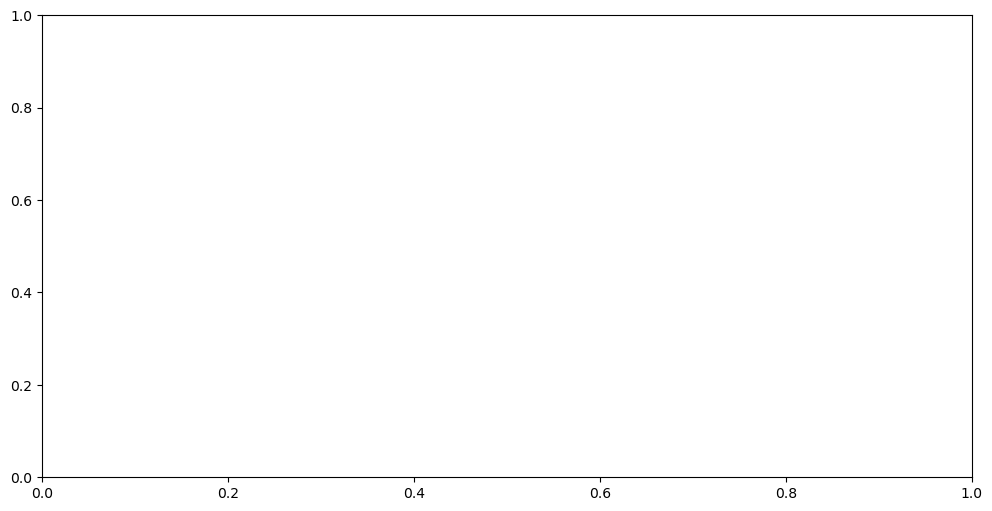

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming H_salary and firstname are lists or arrays containing data
H_salary = [...]  # Your highest selling values
firstname = [...]  # Corresponding employee names
Total_sales = [...]  # Assuming this is defined somewhere in your code

cam_value = np.linspace(0.3, 1, 10)
cm = plt.cm.YlGn(cam_value)

f_title = {'family': 'serif', 'size': 20, 'color': 'red'}
f_xlable = {'family': 'serif', 'size': 15, 'color': 'darkgreen'}
f_ylable = {'family': 'serif', 'size': 15, 'color': 'orange'}

plt.figure(figsize=(12, 6))

# Plotting the line plot
plt.plot(H_salary, color='red', marker='o')

# Plotting the bar plot horizontally
plt.barh(y=range(len(firstname)), width=H_salary, color=cm)

plt.title('Top 10 Selling Employees', pad=20, fontdict=f_title)
plt.xlabel('Highest Selling', fontdict=f_xlable, labelpad=15)
plt.ylabel('Employees Name', fontdict=f_ylable, labelpad=15)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Adding annotations
for i in range(len(firstname)):
    plt.annotate(text=str(H_salary[i]), xy=(H_salary[i], i), fontweight='bold',
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.show()
